In [1]:
#!ls ~/trained_models

In [2]:
#!ls ~/trained_models/
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

# dataset_path = Path.home()/'datasets/NEW_ENCODING'
# dataset_path = Path.home()/'datasets/stateformer33_5hops'
dataset_path = Path.home()/'datasets/coreutils_5hops'
model_path = Path.home()/'trained_models/dragon_5hops_5heads_3lin__NEW_ENCODING_ep30.pt'

In [3]:
dataset = load_dataset_from_path(dataset_path)
df = dataset.read_vars_csv()
df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,False,1,PLL,P,L,L,1000,l,False,False
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,False,1,PLL,P,L,L,1000,l,False,False
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
3,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,False,0,LLL,L,L,L,1001,l,False,False
4,1053575,"57,160,180,226,246",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,False,0,LLL,L,L,L,1001,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1081800,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52880,1081836,"15,21,27,33,39,4...",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52881,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False
52882,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,False,4,LLL,L,L,L,1116,p,False,False


In [4]:
from datatype_recovery.models.eval import make_predictions_on_dataset

# model_pred = make_predictions_on_dataset(model_path, 'cuda:0', dataset)
model_pred = make_predictions_on_dataset(model_path, 'cpu', dataset)

DragonModel(
  (gat_layers): ModuleList(
    (0): GATConv(86, 128, heads=5)
    (1-4): 4 x GATConv(640, 128, heads=5)
  )
  (shared_linear_layers): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
  )
  (ptr_l1_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l2_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l3_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (leaf_category_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True

100%|██████████| 251/251 [02:01<00:00,  2.06it/s]


In [237]:
#model_pred

In [6]:
mdf = df.merge(model_pred, how='right', on=['BinaryId','FunctionStart','Signature','Vartype'])
mdf['LeafType'] = mdf.TypeSeq_Debug.apply(lambda x: x.split(',')[-1])
mdf['PredLeafType'] = mdf.Pred.apply(lambda x: x.split(',')[-1])
mdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1053417,"37,78,82,107,111",local_a8,rusage,stack,NaN,-168.0,STRUCT,STRUCT,usage,...,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1053417,"78,82,107,111,130",param_1,timeval*,register,rdi,56.0,PTR,"PTR,STRUCT",ts,...,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1053575,"37,94,114",local_b8,timeval,stack,NaN,-184.0,STRUCT,STRUCT,real_end,...,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1081836,"15,21,27,33,39,4...",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52880,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52881,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52882,1081991,"60,67,73",uVar1,uint64,register,rax,0.0,BUILTIN,uint64,_Var1,...,int32,int32,LLL,L,L,L,BUILTIN,True,False,4


In [264]:
import seaborn as sns

# context: talk, notebook, paper, poster
# palette: muted, Paired, hls, husl, pastel, bright, deep, dark, colorblind
sns.set_theme(style='whitegrid', context='notebook', palette='muted')

In [7]:
def percent_accuracy(df:pd.DataFrame, col1:str, col2:str) -> float:
    return len(df[df[col1]==df[col2]])/len(df)*100

acc = percent_accuracy(mdf, 'TypeSeq_Debug', 'Pred')
acc_raw = percent_accuracy(mdf, 'TypeSeq_Debug', 'RawPred')

print(f'Eval dataset size = {len(mdf):,}')
print(f'Accuracy: {acc:.2f}%')
print(f'Accuracy (raw): {acc_raw:.2f}%')

Eval dataset size = 52,884
Accuracy: 70.63%
Accuracy (raw): 70.63%


In [28]:
mdf[['TypeSeq_Debug','Pred','LeafType','PredLeafType']]

,TypeSeq_Debug,Pred,LeafType,PredLeafType
0,"PTR,char","PTR,char",char,char
1,"PTR,char","PTR,char",char,char
2,STRUCT,STRUCT,STRUCT,STRUCT
3,"PTR,STRUCT","PTR,STRUCT",STRUCT,STRUCT
4,STRUCT,STRUCT,STRUCT,STRUCT
...,...,...,...,...
52879,int32,int32,int32,int32
52880,int32,int32,int32,int32
52881,int32,int32,int32,int32
52882,char,int32,char,int32


In [259]:
def plot_accuracies(df:pd.DataFrame, truth_outputs:List[str], rot:int=25, figsize=None):
    acc_values = []

    for t in truth_outputs:
        pred = f'Pred{t}'
        acc = percent_accuracy(df, t, pred)
        # print(f'{t} accuracy: {acc:.2f}%')
        acc_values.append((t, acc))

    ax = pd.DataFrame.from_records(acc_values, columns=['Output', 'Accuracy']).set_index('Output')\
        .Accuracy.sort_values(ascending=True).plot(kind='bar', rot=rot, title='Accuracy',
            ylabel='Accuracy (%)', xlabel='Classifier', figsize=figsize)
        # .sort_values('Accuracy',ascending=False).

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')#, label_type='center')

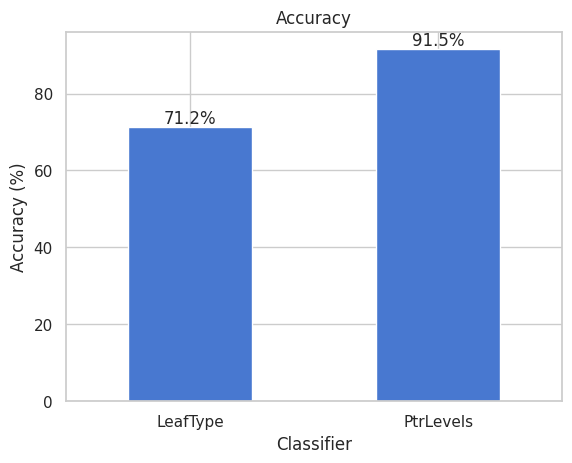

In [265]:
primary_outputs = ['PtrLevels','LeafType']
detailed_outputs = ['LeafCategory', 'LeafSigned', 'LeafFloating', 'LeafSize',
               'PtrL1', 'PtrL2', 'PtrL3']

plot_accuracies(mdf, primary_outputs, rot=0)

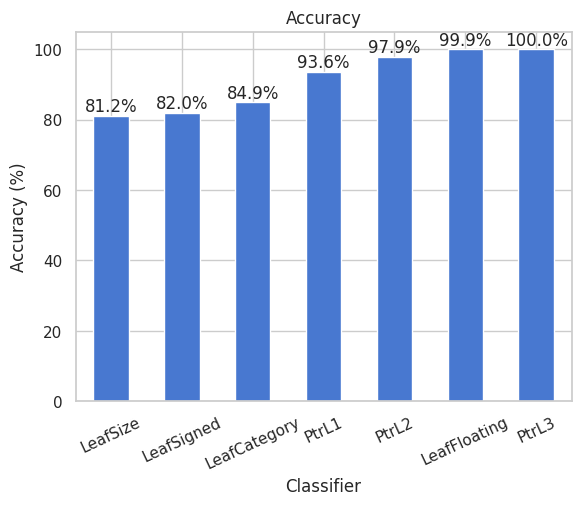

In [266]:
plot_accuracies(mdf, detailed_outputs)

<Axes: title={'center': 'Incorrect LeafType Predictions'}, xlabel='LeafCategory'>

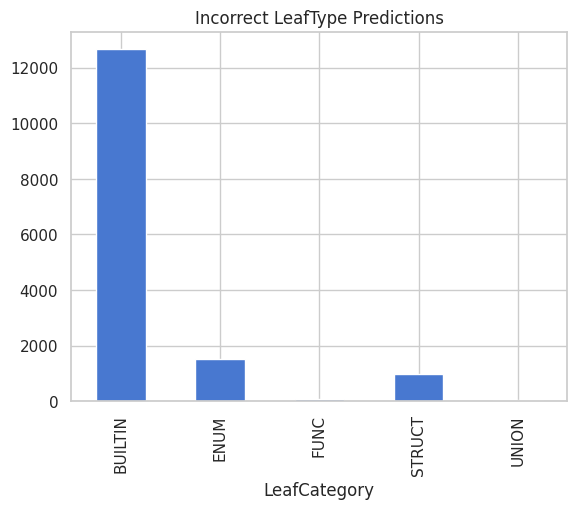

In [267]:
mdf[mdf.LeafType!=mdf.PredLeafType].groupby('LeafCategory').count().FunctionStart.plot(kind='bar',
    title='Incorrect LeafType Predictions')

<Axes: title={'center': 'Dataset by LeafCategory'}, xlabel='LeafCategory'>

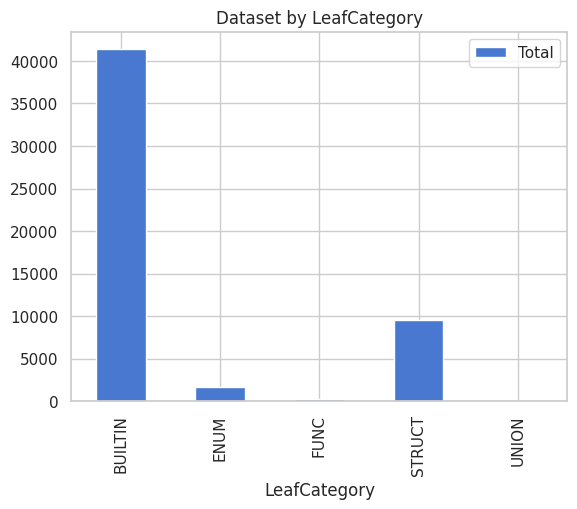

In [292]:
# print(f'{12661/41369*100:.2f}%')
# print(f'{28708/41369*100:.2f}%')
# print(f'{12661+28708:,}')

total_by_lcat = mdf.groupby('LeafCategory').count()[['FunctionStart']].rename({'FunctionStart':'Total'},axis=1)
total_by_lcat.plot(kind='bar', title='Dataset by LeafCategory')

<Axes: title={'center': 'Dataset by LeafType'}, xlabel='LeafType'>

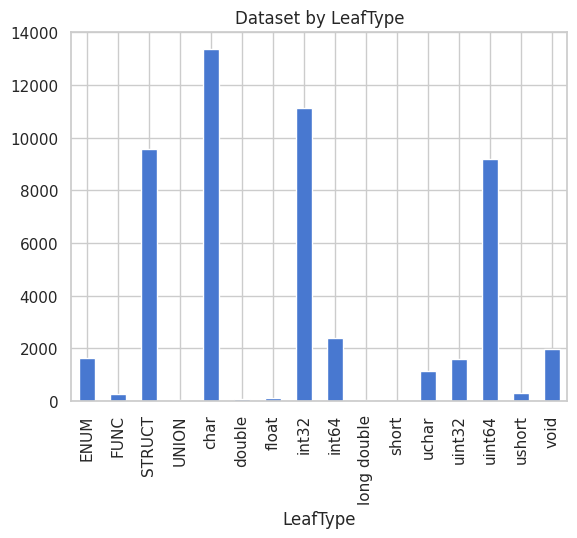

In [297]:
mdf.groupby('LeafType').count().FunctionStart.plot(kind='bar',title='Dataset by LeafType')

array([6.4, 4.8])

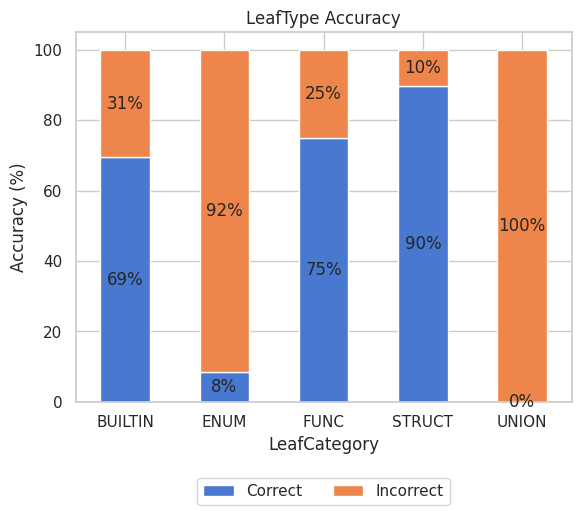

In [276]:

ldf = mdf.groupby([mdf.LeafType==mdf.PredLeafType, 'LeafCategory']).count()[['FunctionStart']]
ldf = ldf.reset_index(names=['Correct','LeafCategory'])\
    .pivot(index='LeafCategory', columns='Correct', values='FunctionStart')\
    .rename({False: 'Incorrect', True: 'Correct'},axis=1)

ldf['Total'] = total_by_lcat
ldf['Incorrect'] = ldf.Incorrect/ldf.Total*100
ldf['Correct'] = ldf.Correct/ldf.Total*100
ax = ldf[['Correct','Incorrect']].plot(kind='bar', stacked=True, rot=0, title='LeafType Accuracy',
    ylabel='Accuracy (%)', xlabel='LeafCategory')
ax.legend(loc='lower center', bbox_to_anchor=(.5,-0.3), ncol=2)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center')
ax.get_figure().get_size_inches()

In [285]:
# mdf[(mdf.LeafType!=mdf.PredLeafType)&(mdf.LeafCategory=='BUILTIN')].groupby('LocType_Strip').count().FunctionStart.plot(kind='bar')

# ----------------------------------------
# TODO: PICK UP HERE
#
# set up functions that accept a dataframe (or an interesting subset like this one)
# ----------------------------------------

# TODO - given this df, plot the correct/incorrect predictions SIDE BY SIDE as a grouped or stacked bar chart
# (like above)

# TODO: basically, convert the code above into a function that:
#   --> accepts a dataframe (incl. a subset)
#   --> accepts a condition to split on (leaftype!=predleaftype)
#   --> accepts a column to group the results by (LeafCategory above, the pivot index)
#   --> lets me choose to show percentages or values
# - percentages are nice when scales are out of whack, but you lose track of what's significant

subset_df = mdf.loc[mdf.LeafCategory=='BUILTIN']
subset_df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType
0,1053065,"25,33",__s,char*,register,rax,0.0,PTR,"PTR,char",__s,...,PLL,P,L,L,BUILTIN,True,False,1,char,char
1,1053110,"17,26,40,48,62,66",local_10,char*,stack,NaN,-16.0,PTR,"PTR,char",codeset,...,PLL,P,L,L,BUILTIN,True,False,1,char,char
8,1054017,"300,300,300",auVar1,uchar[16],unique,NaN,243584.0,ARR,"ARR,uchar",auVar2,...,ALL,A,L,L,BUILTIN,False,False,1,uchar,uchar
9,1054017,"145,485",iVar2,int32,register,eax,0.0,BUILTIN,int32,iVar3,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
10,1054017,"116,166,397,461",__size,uint64,register,rax,0.0,BUILTIN,uint64,__size,...,LLL,L,L,L,BUILTIN,False,False,8,uint64,uint64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1081836,"15,21,27,33,39,4...",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52880,1081910,"15,21,25",param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52881,1081955,14,param_1,int32,register,edi,56.0,BUILTIN,int32,c,...,LLL,L,L,L,BUILTIN,True,False,4,int32,int32
52882,1081991,"60,67,73",uVar1,uint64,register,rax,0.0,BUILTIN,uint64,_Var1,...,LLL,L,L,L,BUILTIN,True,False,4,char,int32


In [60]:
len(mdf)

52884

In [56]:
import numpy as np
mdf.groupby(np.where(mdf.LeafType==mdf.PredLeafType, 'Correct','Incorrect')).count()

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize,LeafType,PredLeafType
Correct,37652,37652,37652,37652,37652,22962,37652,37652,37652,37652,...,37652,37652,37652,37652,37652,37652,37652,37652,37652,37652
Incorrect,15232,15232,15232,15232,15232,11450,15232,15232,15232,15232,...,15232,15232,15232,15232,15232,15232,15232,15232,15232,15232


In [12]:
model_pred

# TODO: sort individual classifiers - show highest performing!
# TODO: update this eval notebook and compute RESULTS
# TODO - update model to feed some outputs into other task-specific layers (see diagram)
# TODO - retrain with bigger dataset (w/e my custom training dataset was before?)
# TODO - overall accuracy? raw vs. corrected?
# TODO - individual classifiers? (leaf category, ptrl1, floating, signed...)
# TODO - accuracy on PTR,STRUCT true types?
#           -> locals vs. params? non-unique? register? ...
# TODO - eval on benchmarks vs. others (DIRTY, OSPREY, StateFormer...?)
# TODO - ok, what other experiments do we need to run to publish?
# ---> evaluate scalability?

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1053065,"25,33",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
1,1000,1053110,"17,26,40,48,62,66",l,"PTR,char","PTR,char",PLL,P,L,L,BUILTIN,True,False,1
2,1001,1053417,"37,78,82,107,111",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
3,1001,1053417,"78,82,107,111,130",p,"PTR,STRUCT","PTR,STRUCT",PLL,P,L,L,STRUCT,False,False,0
4,1001,1053575,"37,94,114",l,STRUCT,STRUCT,LLL,L,L,L,STRUCT,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,1116,1081836,"15,21,27,33,39,4...",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52880,1116,1081910,"15,21,25",p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52881,1116,1081955,14,p,int32,int32,LLL,L,L,L,BUILTIN,True,False,4
52882,1116,1081991,"60,67,73",l,int32,int32,LLL,L,L,L,BUILTIN,True,False,4


# Dataset Balance

<Axes: xlabel='LeafCategory'>

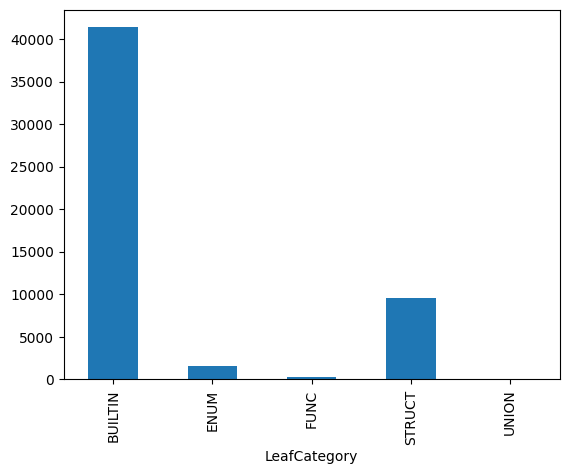

In [13]:
df.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')